<a href="https://colab.research.google.com/github/datlt189/AI_LeTienDat_20146151/blob/main/VN_currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [97]:
folder = '/content/drive/MyDrive/Vietnamese_currency/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('005000'):
    output= 1.0
  if file.startswith('010000'):
    output= 2.0
  if file.startswith('020000'):
    output= 5.0
  if file.startswith('050000'):
    output= 3.0
  if file.startswith('100000'):
    output= 4.0
  if file.startswith('500000'):
    output= 6.0
  photo = load_img(folder + file, target_size= (96,72))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [98]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/data_train/vietnamese_currency', photos)
save('/content/drive/MyDrive/data_train/vietnamese_currency', labels)

(1385, 96, 72, 3) (1385,)


In [99]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [100]:
print(test_x.shape, train_x.shape)

(69, 96, 72, 3) (1316, 96, 72, 3)


In [101]:
train_x = train_x.reshape((1316, 96, 72, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((69, 96, 72, 3))
test_x = test_x.astype('float32')/255

In [102]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,7)
test_y = to_categorical(test_y,7)

In [103]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 32
epochs = 40
classes = 7

In [104]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (96, 72, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [105]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 96, 72, 32)        896       
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 96, 72, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 48, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 48, 36, 64)        18496     
                                                                 
 conv2d_58 (Conv2D)          (None, 48, 36, 64)        36928     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 48, 36, 64)        0         
                                                      

In [106]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
42/42 [==============================] - 5s 26ms/step - loss: 2.0341 - accuracy: 0.1938
Epoch 2/40
42/42 [==============================] - 1s 24ms/step - loss: 2.5217 - accuracy: 0.1581
Epoch 3/40
42/42 [==============================] - 1s 24ms/step - loss: 2.2884 - accuracy: 0.1755
Epoch 4/40
42/42 [==============================] - 1s 24ms/step - loss: 1.9299 - accuracy: 0.1892
Epoch 5/40
42/42 [==============================] - 1s 24ms/step - loss: 1.8502 - accuracy: 0.1976
Epoch 6/40
42/42 [==============================] - 1s 26ms/step - loss: 1.7764 - accuracy: 0.2675
Epoch 7/40
42/42 [==============================] - 1s 26ms/step - loss: 1.8903 - accuracy: 0.2310
Epoch 8/40
42/42 [==============================] - 1s 26ms/step - loss: 1.7381 - accuracy: 0.2850
Epoch 9/40
42/42 [==============================] - 1s 24ms/step - loss: 1.6389 - accuracy: 0.3328
Epoch 10/40
42/42 [==============================] - 1s 24ms/step - loss: 1.2779 - accuracy: 0.4749
Epoch 11/

In [107]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 11ms/step - loss: 0.1896 - accuracy: 0.9275
Test accuracy: 0.9275362491607666


In [108]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/flowers.h5')

1/1 [==============================] - 0s 23ms/step
6
500000


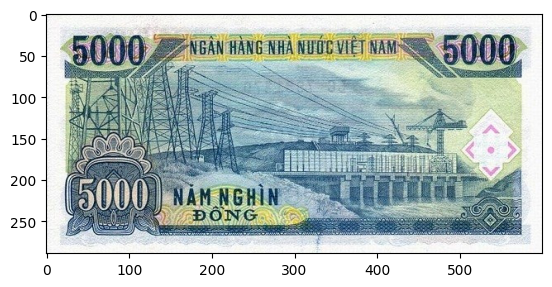

1/1 [==============================] - 0s 43ms/step
5
100000


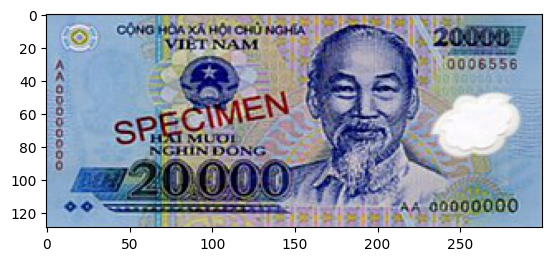

1/1 [==============================] - 0s 44ms/step
0



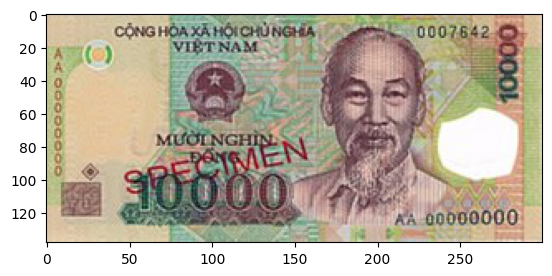

1/1 [==============================] - 0s 35ms/step
5
100000


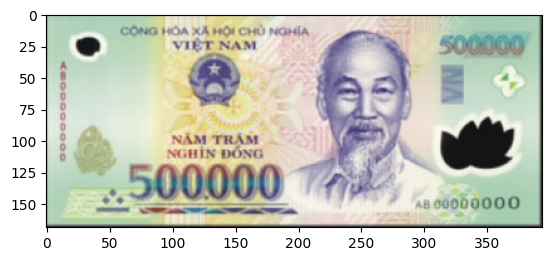

1/1 [==============================] - 0s 36ms/step
5
100000


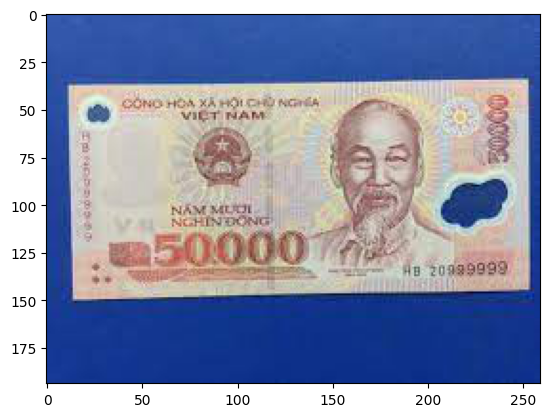

1/1 [==============================] - 0s 31ms/step
0



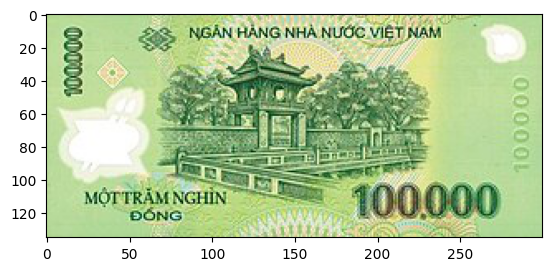

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/test_money/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (96, 72))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', '005000', '010000', '020000', '050000', '100000', '500000']
  print(class_name[result])
  plt.show()